**Technocolabs Mini Project: Bigmart Sales analysis and prediction**

**Loading Packages and Data**

In [68]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Load the dataset
train = pd.read_csv(r"/content/BM_train.csv")
test = pd.read_csv(r"/content/BM_test.csv")

In [70]:
#no of rows and cols in each data set.
print(f"training set (row, col): {train.shape}\n\ntesting set (row, col): {test.shape}")

training set (row, col): (8523, 12)

testing set (row, col): (5681, 11)


**About** **Data**

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [72]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(train.describe())


Summary Statistics:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [74]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(test.describe())


Summary Statistics:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000


**Missing values**

In [75]:
#missing values in decsending order
print("Train:\n")
print(train.isnull().sum().sort_values(ascending=False),"\n\n",train.isnull().sum()/train.shape[0] *100,"\n\n")
print("Test:\n")
print(test.isnull().sum().sort_values(ascending=False),"\n\n",test.isnull().sum()/test.shape[0] *100,"\n\n")

Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Id

**value counts for Outlet_Size and Item_Weight:**

In [76]:
print("Outlet_Size:\n", train.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", train.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 




In [77]:
print("test mode, train mode\n",[train['Outlet_Size'].mode().values[0], test['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


**Imputing the missing values**

In [78]:
#train
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].dropna().mode().values[0])
#test
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].dropna().mode().values[0])
#checking if we filled missing values
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

Text(0.5, 1.0, 'Item_Weight Boxplot')

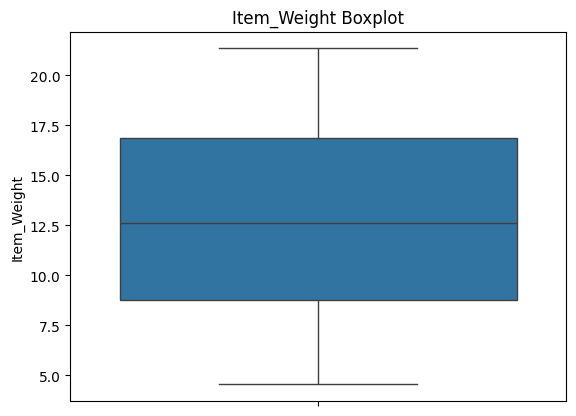

In [79]:
sns.boxplot(data=train['Item_Weight'])
plt.title("Item_Weight Boxplot")

In [80]:
#train
train['Item_Weight'] = train['Item_Weight'].fillna(
train['Item_Weight'].dropna().mean())

#test
test['Item_Weight'] = test['Item_Weight'].fillna(
test['Item_Weight'].dropna().mean())

#checking if we filled missing values
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

**Exploratory Data Analysis (EDA)**

In [81]:
#Listing all the numeric cols
num = train.select_dtypes('number').columns.to_list()
#listing allthe categoric cols
cat = train.select_dtypes('object').columns.to_list()
#numeric df
BM_num = train[num]
#categoric df
BM_cat = train[cat]
print(num)
print(cat)
[train[category].value_counts() for category in cat[1:]]

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

In [82]:
#replacing Repeated values
#train
train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
['Low Fat','Low Fat','Regular'],inplace = True)
#test
test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
['Low Fat','Low Fat','Regular'],inplace = True)
#check result
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [83]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [84]:
#creating our new column for both datasets using 'Outlet_Establishment_Year'column
train['Outlet_Age'], test['Outlet_Age']= train['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), test['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)
##uncomment to check result
train['Outlet_Age'].head
test['Outlet_Age'].head

<bound method NDFrame.head of 0       21
1       13
2       22
3       13
4       35
        ..
5676    23
5677    11
5678    18
5679    13
5680    18
Name: Outlet_Age, Length: 5681, dtype: int64>

**Univariate** **Analysis**

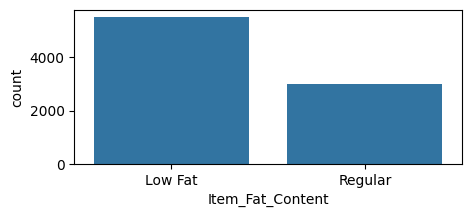

In [85]:
plt.figure(figsize=(5, 2))
sns.countplot(x='Item_Fat_Content', data=train)
plt.xlabel('Item_Fat_Content')
plt.show()

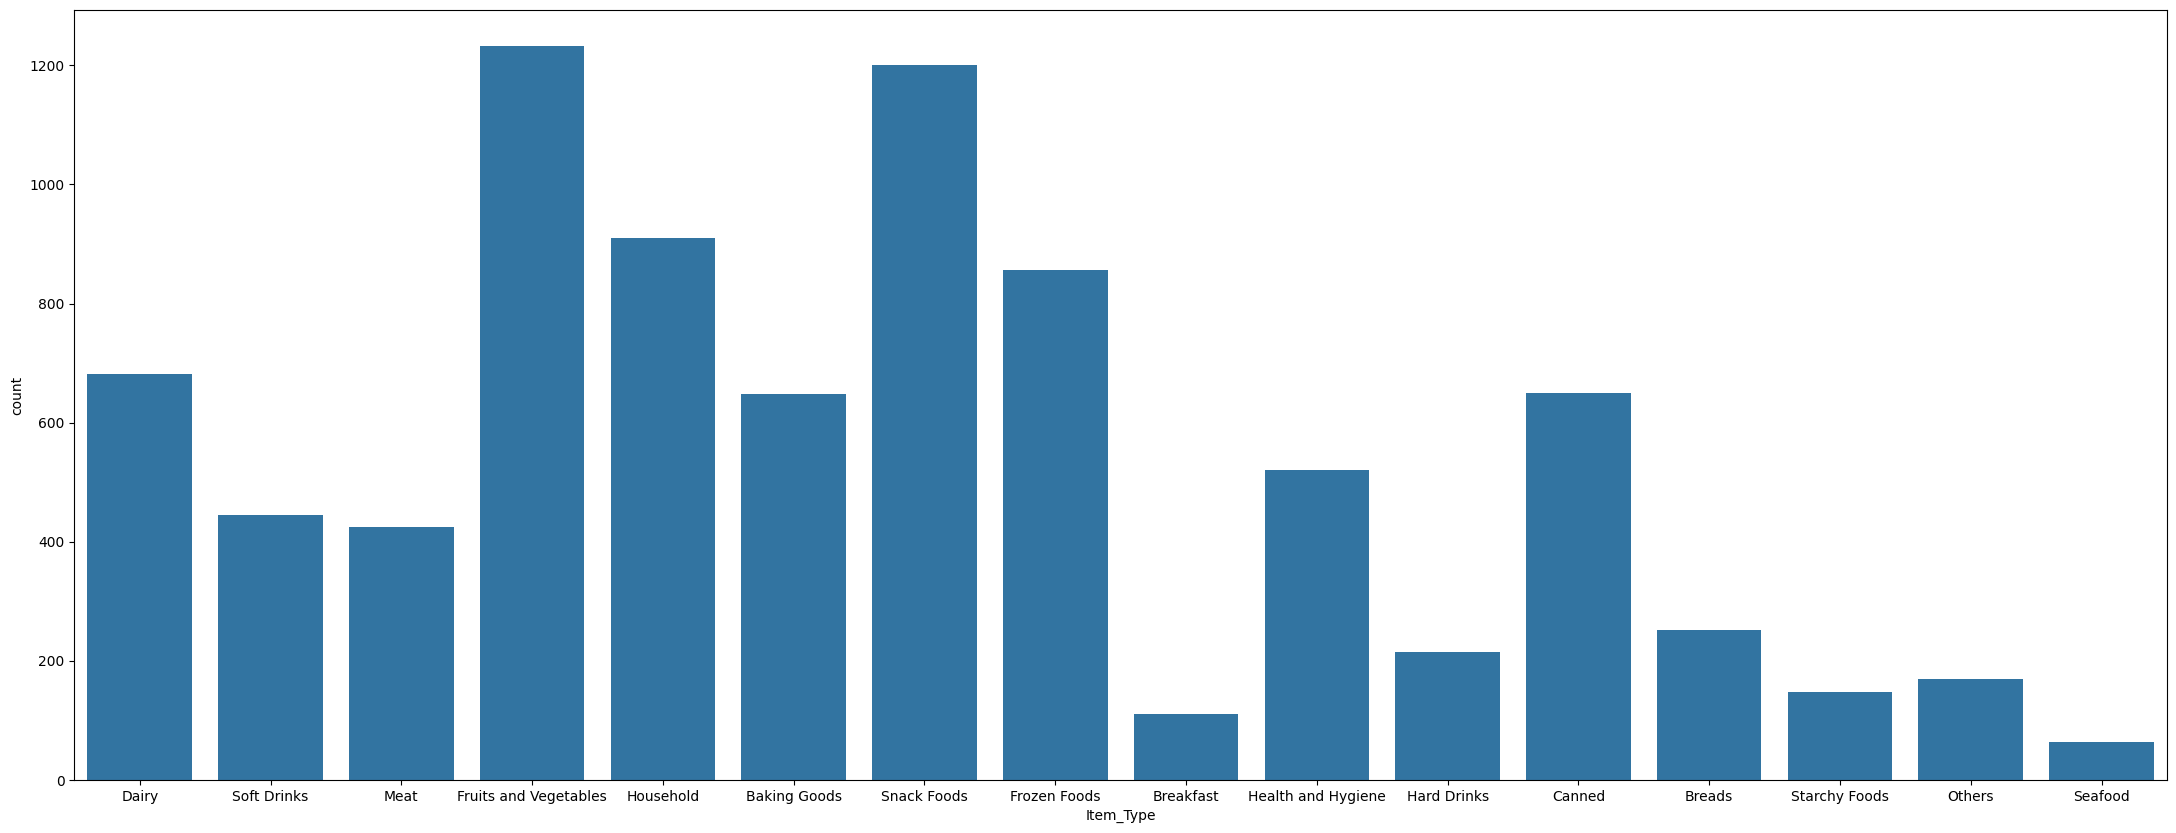

In [86]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=train)
plt.xlabel('Item_Type')
plt.show()

<ipython-input-87-829f92e65f09>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Identifier' , data=train ,palette='winter')


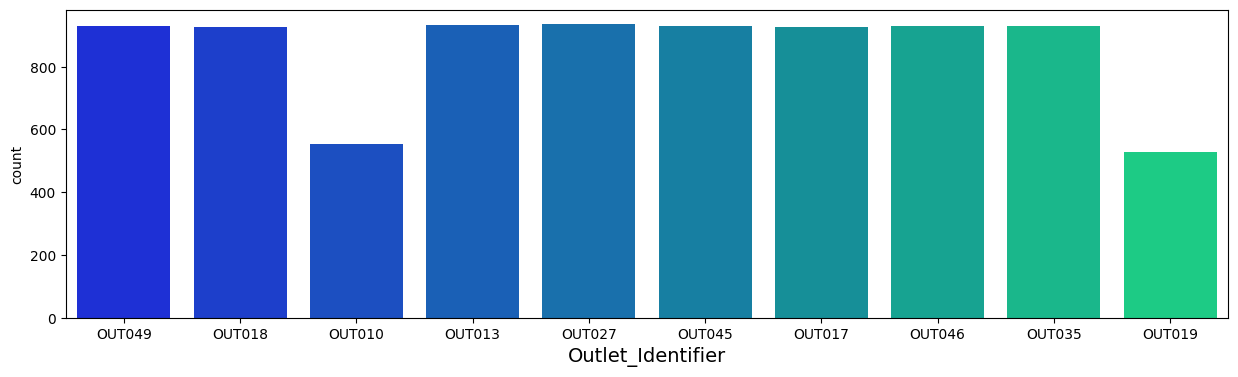

In [87]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=train ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

<ipython-input-88-a02e3097df68>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Size' , data=train ,palette='autumn')


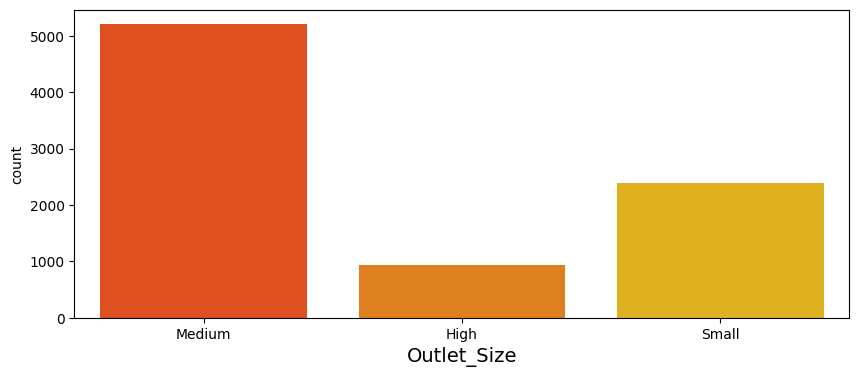

In [88]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=train ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

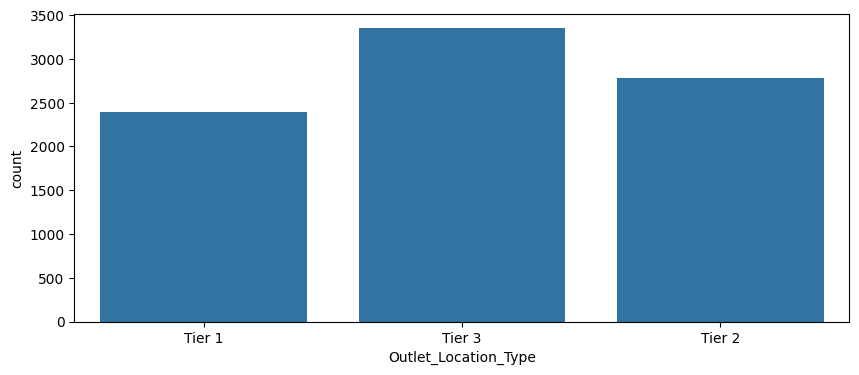

In [89]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=train )
plt.xlabel('Outlet_Location_Type')
plt.show()

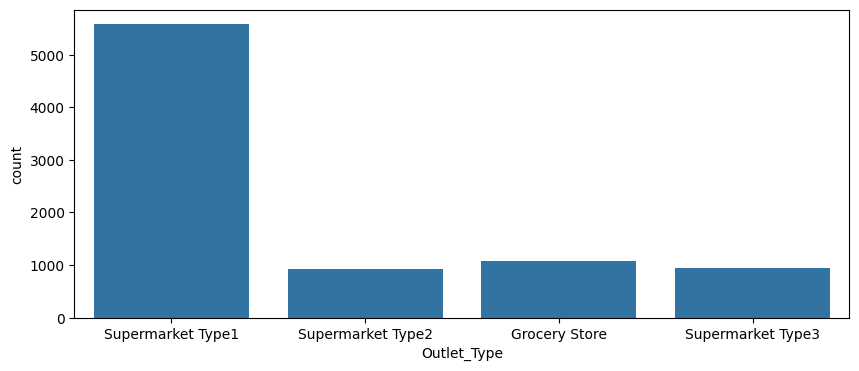

In [90]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=train)
plt.xlabel('Outlet_Type')
plt.show()

for numerical column:


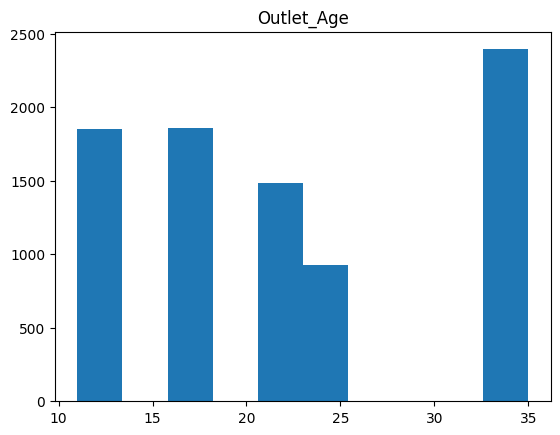

In [91]:
plt.hist(train['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

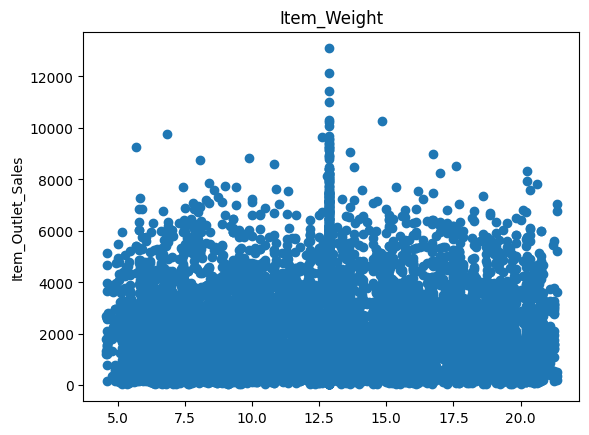

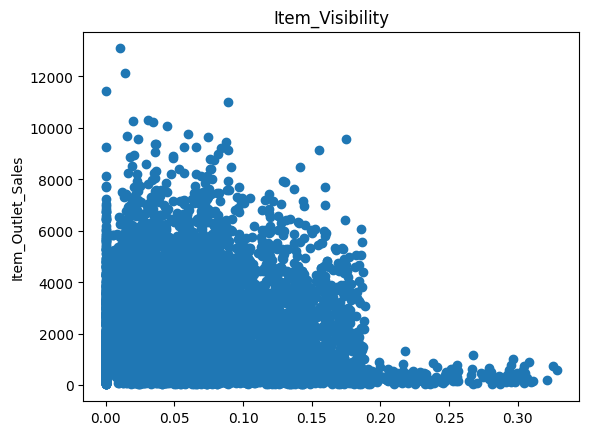

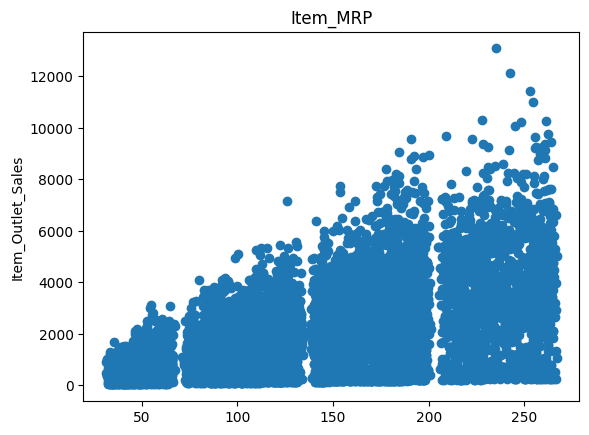

In [92]:
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()





**multivariate plots
**

<ipython-input-93-fc927a0f9621>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train, palette='gist_rainbow_r')


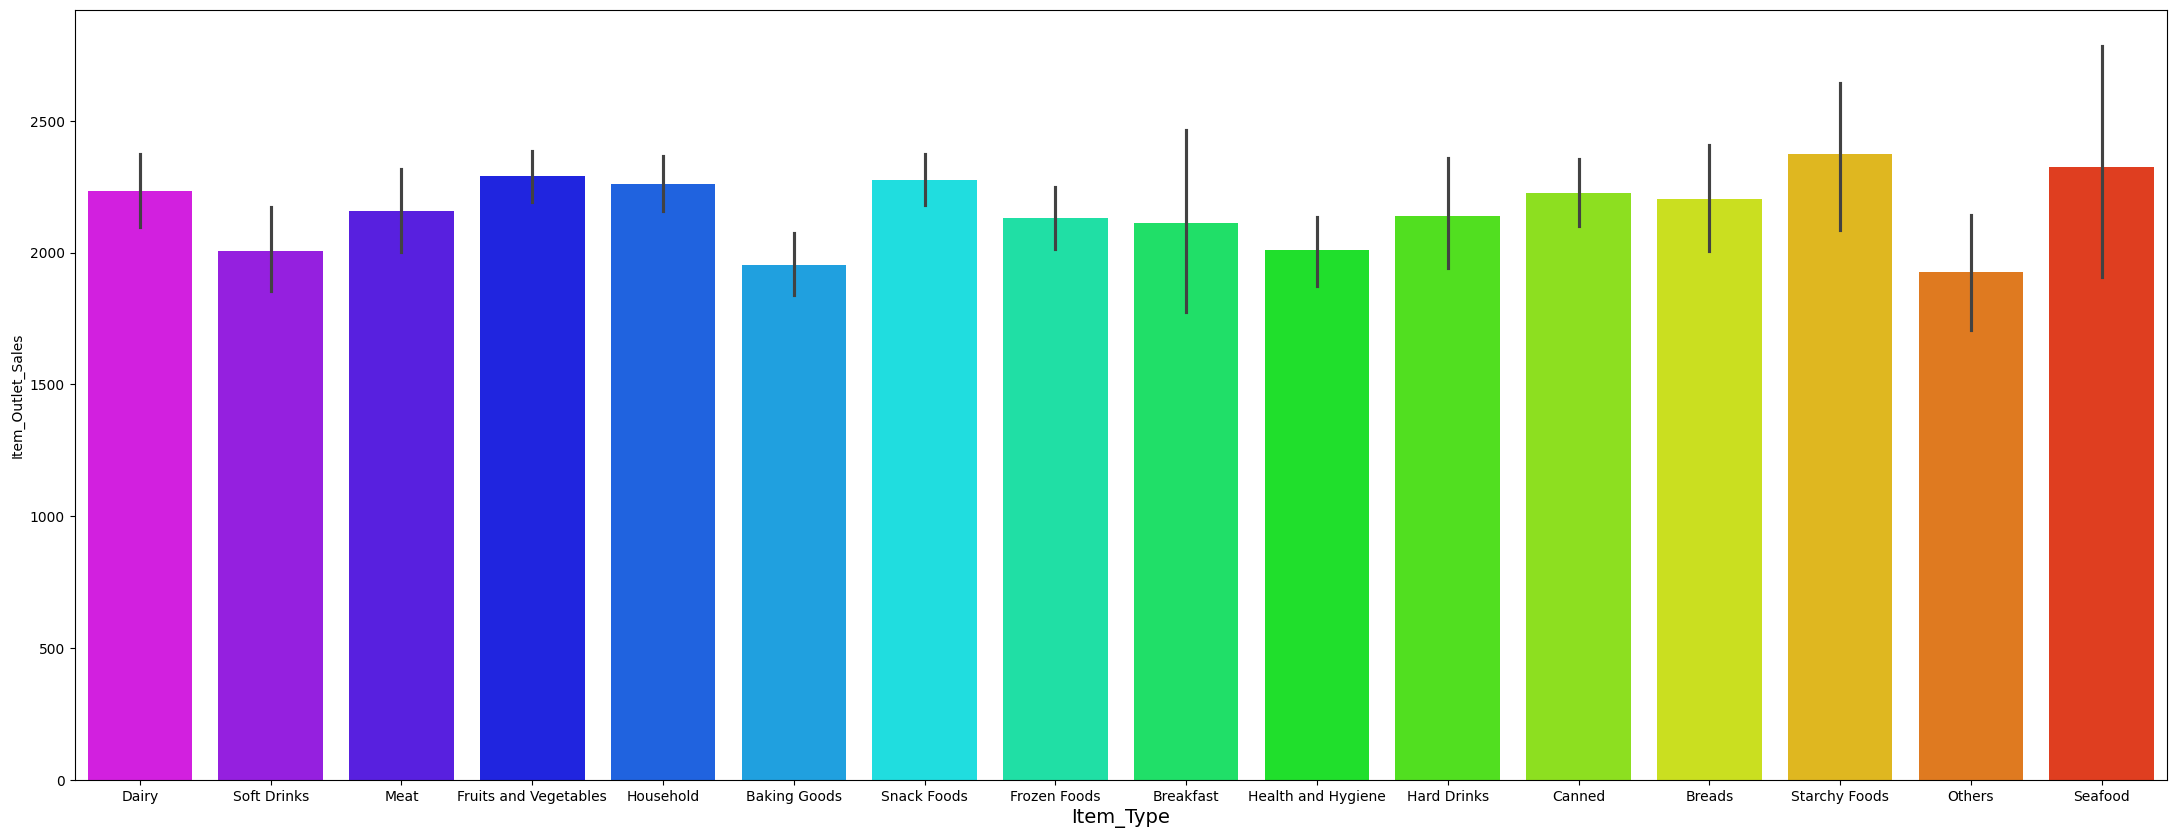

In [93]:
plt.figure(figsize=(27, 10))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train, palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

<ipython-input-94-92abdb25bf11>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train, palette='gist_rainbow')


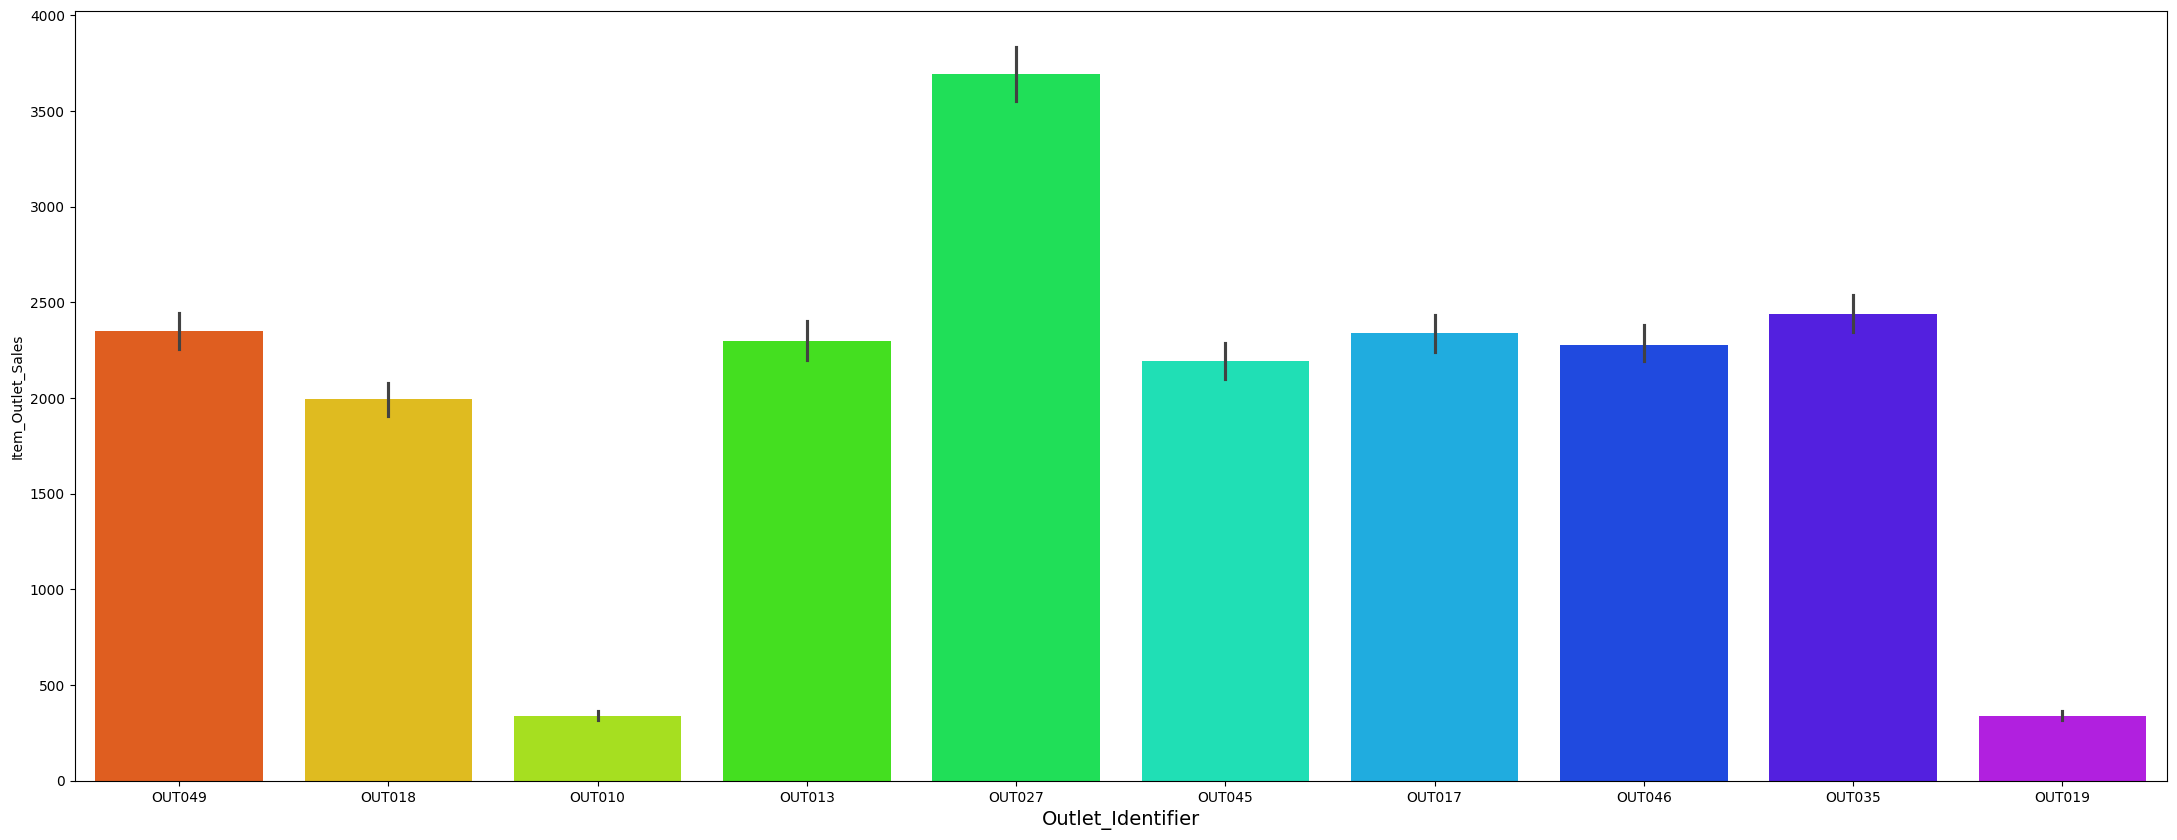

In [94]:
plt.figure(figsize=(27, 10))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train, palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

<ipython-input-95-f5ccd1d64104>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train, palette='nipy_spectral')


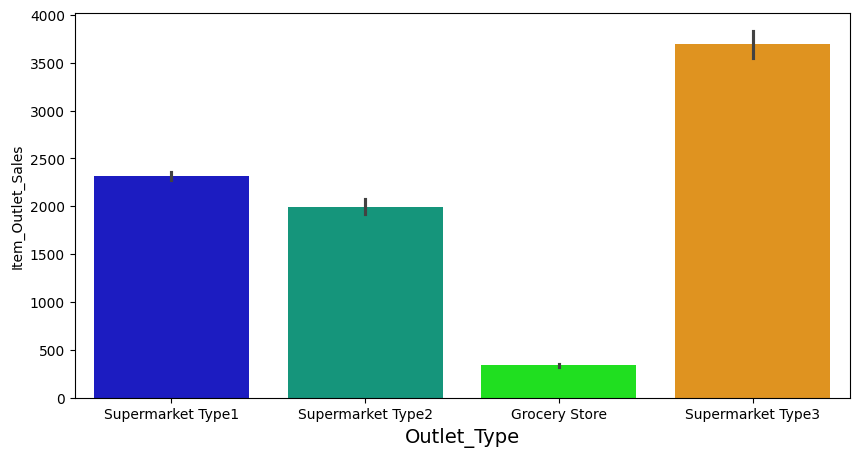

In [95]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train, palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

<ipython-input-96-790e97e9e289>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train, palette='YlOrRd')


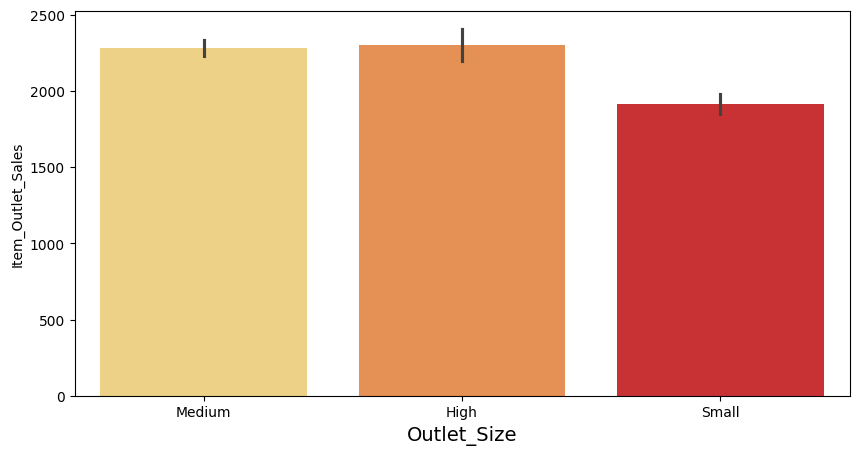

In [96]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train, palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

<ipython-input-97-85a4eb43f504>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train, palette='Spectral')


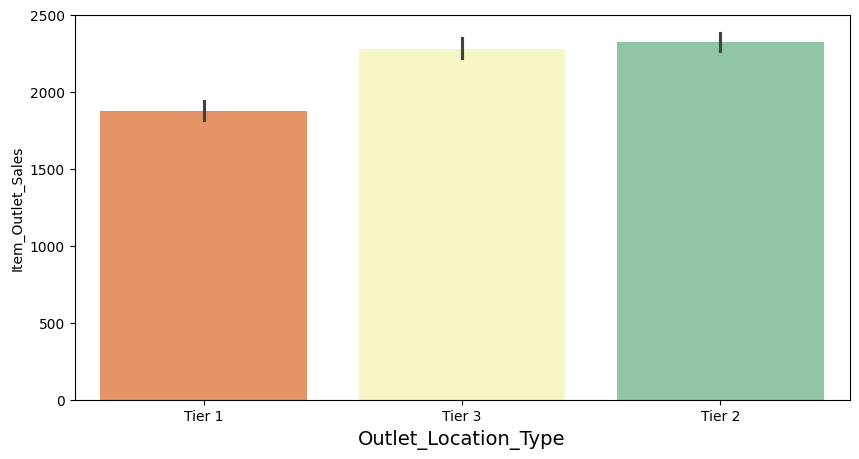

In [97]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train, palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

<ipython-input-98-231b7a7cbcfb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr() ,cmap='rocket')


<Axes: >

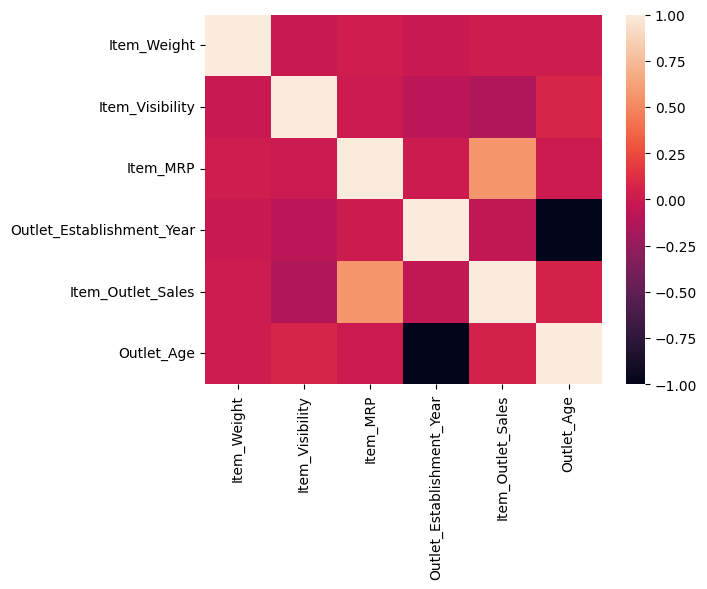

In [98]:
#plotting the correlation matrix
sns.heatmap(train.corr() ,cmap='rocket')

  from the correlation plot we can see taht,Item_Outlet_Sales is highly correlated with Item_MRP



**Feature** **engineering**

In [99]:
BM_cat.apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

**Label** **Encoding** the Ordinal columns

In [100]:
from sklearn.preprocessing import LabelEncoder
Label = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']
le = LabelEncoder()
for i in Label:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


**One** -**Hot** **Encoding** for nominal data

In [101]:
from sklearn.preprocessing import OneHotEncoder
cols = ['Item_Type', 'Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_oh = pd.DataFrame(OH_encoder.fit_transform(train[cols])).astype('int64')
test_oh = pd.DataFrame(OH_encoder.transform(test[cols])).astype('int64') # Use transform instead of fit_trans
# Get feature columns
train_oh.columns = OH_encoder.get_feature_names_out(cols)
test_oh.columns = OH_encoder.get_feature_names_out(cols)
# One-hot encoding removed index; put it back
train_oh.index = train.index
test_oh.index = test.index
# Add one-hot encoded columns to our main df, new name: train_fe, test_fe (means feature engineered)
train_fe = pd.concat([train, train_oh], axis=1)
test_fe = pd.concat([test, test_oh], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


removing the unnecessary columns before builting the model

In [102]:
train_fe  = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
test_fe = test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [103]:
train_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21
1,5.92,1,0.019278,48.2692,1,2,443.4228,11
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21
3,19.20,1,0.000000,182.0950,1,2,732.3800,22
4,8.93,0,0.000000,53.8614,0,2,994.7052,33


**Modeling**

In [104]:
from sklearn.model_selection import train_test_split
#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection import cross_val_score as CVS

In [105]:
y = train_fe['Item_Outlet_Sales']
X = train_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [106]:
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

**linear regression**

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
# Model
LR = LinearRegression()
# Fit
LR.fit(X_train, y_train)
# Predict
y_predict = LR.predict(X_test)
# Evaluation Metrics
LR_MAE = mean_absolute_error(y_test, y_predict)
LR_MSE = mean_squared_error(y_test, y_predict)
LR_R2 = r2_score(y_test, y_predict)
LR_CS = round(CVS(LR, X, y, cv=5).mean(),4)
print(f" Mean Absolute Error: {round(LR_MAE, 2)}")
print(f" Mean Squared Error: {round(LR_MSE, 2)}")
print(f" R^2 Score: {round(LR_R2, 4)}")
# Cross-Validation
cv_scores = cross_val_score(LR, X, y, cv=5)
average_cv_score = cv_scores.mean()
print(f"\n Cross-Validation Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f" Fold {i}: {round(score, 2)}")
print(f"\n Average Cross-Validation Score: {round(average_cv_score, 4)}")

 Mean Absolute Error: 1024.87
 Mean Squared Error: 1907307.45
 R^2 Score: 0.3462

 Cross-Validation Scores:
 Fold 1: 0.36
 Fold 2: 0.35
 Fold 3: 0.35
 Fold 4: 0.35
 Fold 5: 0.33

 Average Cross-Validation Score: 0.3483


In [108]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")
Linear_Regression


,y_test,prediction
4931,1426.1436,2313.599409
4148,1201.7690,1419.559739
7423,1836.2764,2076.750333
4836,2410.8618,2360.961506
944,1549.9824,3440.020614
...,...,...
5517,4146.6024,3108.246861
7820,649.8208,669.438601
3406,2050.6640,1629.479121
6538,1149.8366,1756.496010


**Regularized Linear Regression**(lasso regression)

In [109]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
# Create a Lasso model
LS = Lasso(alpha=0.05)
# Fit the model to the training data
LS.fit(X_train, y_train)
# Make predictions on the test set
y_predict = LS.predict(X_test)
# Calculate evaluation metrics
LS_MAE = round(mean_absolute_error(y_test, y_predict), 2)
LS_MSE = round(mean_squared_error(y_test, y_predict), 2)
LS_R2 = round(r2_score(y_test, y_predict), 4)
# Print the evaluation metrics
print(f"Mean Absolute Error: {LS_MAE}")
print(f"Mean Squared Error: {LS_MSE}")
print(f"R^2 Score: {LS_R2}")
# Cross-validation
LS_CS = round(cross_val_score(LS, X, y, cv=5).mean(), 4)
print(f"Cross-validated Score: {LS_CS}")

Mean Absolute Error: 1024.84
Mean Squared Error: 1907340.11
R^2 Score: 0.3462
Cross-validated Score: 0.3483


In [110]:
Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Lasso_Regressor.to_csv("Lasso Regressor.csv")
Lasso_Regressor

,y_test,prediction
4931,1426.1436,2314.222508
4148,1201.7690,1418.427139
7423,1836.2764,2076.107254
4836,2410.8618,2359.988593
944,1549.9824,3439.705020
...,...,...
5517,4146.6024,3109.254223
7820,649.8208,670.800550
3406,2050.6640,1628.981464
6538,1149.8366,1755.855624


**Random Forest**

In [111]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)
#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS = round(CVS(RFR, X, y, cv=5).mean(),4)
print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 1034.58

 Mean Squared Error: 1976908.99

 R^2 Score: 0.3224

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.56
0.54
0.53
0.54
0.56
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5465


In [112]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")
Random_Forest_Regressor

,y_test,prediction
4931,1426.1436,2153.169669
4148,1201.7690,989.719467
7423,1836.2764,2072.677047
4836,2410.8618,2143.458140
944,1549.9824,3044.841539
...,...,...
5517,4146.6024,3904.195251
7820,649.8208,1019.961603
3406,2050.6640,1618.978532
6538,1149.8366,1605.298028


**XGBoost**

In [113]:
pip install xgboost

In [117]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Assume you have X_train, X_test, y_train, y_test defined earlier

# Create an XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=3)  # Add max_depth

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics
xgb_MSE = round(mean_squared_error(y_test, y_pred_xgb), 2)
xgb_MAE = round(mean_absolute_error(y_test, y_pred_xgb), 2)
xgb_R2 = round(r2_score(y_test, y_pred_xgb), 4)

# Print the evaluation metrics
print(f"Mean Squared Error (XGBoost): {xgb_MSE}")
print(f"Mean Absolute Error (XGBoost): {xgb_MAE}")
print(f"R^2 Score (XGBoost): {xgb_R2}")

# Cross-validation
xgb_CS = round(cross_val_score(xgb_model, X, y, cv=5).mean(), 4)
print(f"Cross-validated Score (XGBoost): {xgb_CS}")


Mean Squared Error (XGBoost): 1333524.2
Mean Absolute Error (XGBoost): 843.17
R^2 Score (XGBoost): 0.5429
Cross-validated Score (XGBoost): 0.56


**Summary**

In [118]:
MAE= [LR_MAE,RFR_MAE,LS_MAE,xgb_MSE]
MSE= [LR_MSE,RFR_MSE,LS_MSE,xgb_MAE]
R2= [LR_R2,RFR_R_2,LS_R2,xgb_R2]
Cross_score= [LR_CS,RFR_CS,LS_CS,xgb_CS]
Models = pd.DataFrame({
'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor","XGB Regressor"],
'MAE': MAE, 'MSE': MSE, 'R^2':R2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
2,Lasso Regressor,1.024840e+03,1.907340e+06,0.346200,0.3483
0,Linear Regression,1.024872e+03,1.907307e+06,0.346249,0.3483
1,Random Forest Regressor,1.034580e+03,1.976909e+06,0.322400,0.4120
3,XGB Regressor,1.333524e+06,8.431700e+02,0.542900,0.5600


**Observations**:

->XGB Regressor has the highest R^2 score (0.542900) and Cross Validation Score (0.5600). It indicates that XGB Regressor captures more variance in the data and performs well in cross-validation.


->Lasso Regressor and Linear Regression have similar performance in terms of R^2 and Cross Validation Score, but slightly lower than Random Forest and XGB Regressors.


->Random Forest Regressor has a lower R^2 and Cross Validation Score compared to XGB Regressor.